In [ ]:
import numpy as np
import pandas as pd
import cv2
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile,os
zipref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/face mask data.zip','r')
zipref.extractall('./data')
zipref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/data/Face Mask Dataset/Train'
test_dir = '/content/data/Face Mask Dataset/Test'
val_dir = '/content/data/Face Mask Dataset/Validation'

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}

MobileNetV2 Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(128,128,3))
for layer in mobilenet.layers:
    layer.trainable = False
model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 2)                 40962     
                                                                 
Total params: 2,298,946
Trainable params: 40,962
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")
mnv2history = model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,validation_steps=len(val_generator)//32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
9/9 [==============================] - 14s 200ms/step - loss: 1.2410 - accuracy: 0.7431
Epoch 2/20
9/9 [==============================] - 2s 183ms/step - loss: 0.1046 - accuracy: 0.9688
Epoch 3/20
9/9 [==============================] - 2s 187ms/step - loss: 0.0411 - accuracy: 0.9826
Epoch 4/20
9/9 [==============================] - 2s 187ms/step - loss: 0.0974 - accuracy: 0.9861
Epoch 5/20
9/9 [==============================] - 2s 189ms/step - loss: 0.2718 - accuracy: 0.9757
Epoch 6/20
9/9 [==============================] - 2s 189ms/step - loss: 0.2327 - accuracy: 0.9653
Epoch 7/20
9/9 [==============================] - 2s 185ms/step - loss: 0.1170 - accuracy: 0.9688
Epoch 8/20
9/9 [==============================] - 2s 190ms/step - loss: 0.0926 - accuracy: 0.9861
Epoch 9/20
9/9 [==============================] - 2s 188ms/step - loss: 0.0426 - accuracy: 0.9861
Epoch 10/20
9/9 [==============================] - 2s 219ms/step - loss: 0.0578 - accuracy: 0.9816
Epoch 11/20
9/9 [=

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.01608876697719097, 0.9950000047683716]

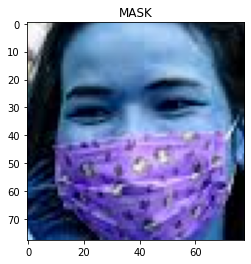

In [ ]:
img = cv2.imread('/content/data/Face Mask Dataset/Test/WithMask/1203.png')
sample_mask_img = cv2.resize(img,(128,128))
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0
mask_result = model.predict(sample_mask_img)
plt.title(mask_label[mask_result.argmax()])
plt.imshow(img)

In [ ]:
model.save('masknet.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


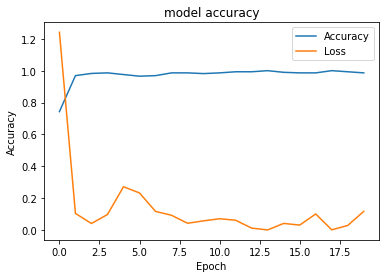

In [ ]:
plt.plot(mnv2history.history['accuracy'])
plt.plot(mnv2history.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Accuracy','Loss'])
plt.show()

VGG16 Architecture

In [ ]:
from tensorflow.keras.applications import VGG16
from keras import layers
from keras import optimizers

In [ ]:
vgg16_model = VGG16(weights = 'imagenet' ,include_top = False, input_shape = (128, 128, 3))
for layer in vgg16_model.layers:
    layer.trainable = False
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation = 'sigmoid'))
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 16,812,610
Trainable params: 2,097,922
Non-trainable params: 14,714,688
___________________________________

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")
vgghistory = model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,validation_steps=len(val_generator)//32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
9/9 [==============================] - 7s 222ms/step - loss: 1.4851 - accuracy: 0.6146
Epoch 2/20
9/9 [==============================] - 2s 213ms/step - loss: 0.3166 - accuracy: 0.8958
Epoch 3/20
9/9 [==============================] - 2s 209ms/step - loss: 0.1756 - accuracy: 0.9444
Epoch 4/20
9/9 [==============================] - 2s 210ms/step - loss: 0.1499 - accuracy: 0.9444
Epoch 5/20
9/9 [==============================] - 2s 210ms/step - loss: 0.0966 - accuracy: 0.9618
Epoch 6/20
9/9 [==============================] - 2s 208ms/step - loss: 0.1296 - accuracy: 0.9514
Epoch 7/20
9/9 [==============================] - 2s 210ms/step - loss: 0.0630 - accuracy: 0.9861
Epoch 8/20
9/9 [==============================] - 2s 211ms/step - loss: 0.0539 - accuracy: 0.9861
Epoch 9/20
9/9 [==============================] - 2s 209ms/step - loss: 0.0515 - accuracy: 0.9826
Epoch 10/20
9/9 [==============================] - 2s 210ms/step - loss: 0.0475 - accuracy: 0.9861
Epoch 11/20
9/9 [==

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.029838107526302338, 0.9912499785423279]

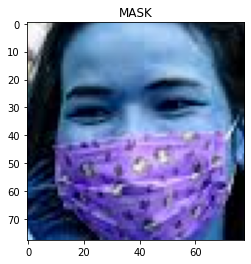

In [ ]:
img = cv2.imread('/content/data/Face Mask Dataset/Test/WithMask/1203.png')
sample_mask_img = cv2.resize(img,(128,128))
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0
mask_result = model.predict(sample_mask_img)
plt.title(mask_label[mask_result.argmax()])
plt.imshow(img)

In [ ]:
model.save('VGG16net.h5')

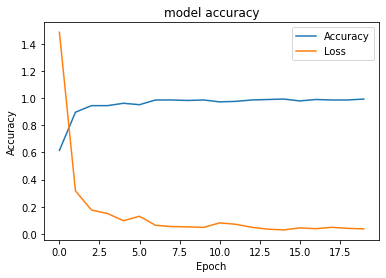

In [ ]:
plt.plot(vgghistory.history['accuracy'])
plt.plot(vgghistory.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Accuracy','Loss'])
plt.show()

InceptionResNetV2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

In [ ]:
InceptionResNetV2_model = InceptionResNetV2(weights = 'imagenet' ,include_top = False, input_shape = (128, 128, 3))
for layer in InceptionResNetV2_model.layers:
    layer.trainable = False
model = Sequential()
model.add(InceptionResNetV2_model)
model.add(Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 2, 2, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_2 (Flatten)         (None, 6144)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               1573120   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 514       
                                                                 
Total params: 55,910,370
Trainable params: 1,573,634
Non-trainable params: 54,336,736
__________________________________

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")
irnv2history = model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,validation_steps=len(val_generator)//32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
9/9 [==============================] - 16s 252ms/step - loss: 1.4589 - accuracy: 0.8611
Epoch 2/20
9/9 [==============================] - 2s 237ms/step - loss: 0.0969 - accuracy: 0.9861
Epoch 3/20
9/9 [==============================] - 2s 236ms/step - loss: 0.4464 - accuracy: 0.9826
Epoch 4/20
9/9 [==============================] - 2s 240ms/step - loss: 0.5284 - accuracy: 0.9688
Epoch 5/20
9/9 [==============================] - 2s 236ms/step - loss: 0.8128 - accuracy: 0.9792
Epoch 6/20
9/9 [==============================] - 2s 236ms/step - loss: 0.2304 - accuracy: 0.9722
Epoch 7/20
9/9 [==============================] - 2s 236ms/step - loss: 0.2574 - accuracy: 0.9757
Epoch 8/20
9/9 [==============================] - 2s 236ms/step - loss: 0.5757 - accuracy: 0.9688
Epoch 9/20
9/9 [==============================] - 2s 239ms/step - loss: 0.0578 - accuracy: 0.9896
Epoch 10/20
9/9 [==============================] - 2s 240ms/step - loss: 0.3721 - accuracy: 0.9688
Epoch 11/20
9/9 [=

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.012792306020855904, 0.9950000047683716]

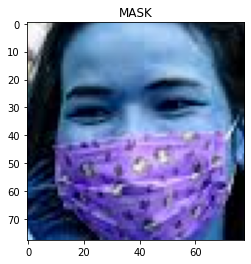

In [ ]:
img = cv2.imread('/content/data/Face Mask Dataset/Test/WithMask/1203.png')
sample_mask_img = cv2.resize(img,(128,128))
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0
mask_result = model.predict(sample_mask_img)
plt.title(mask_label[mask_result.argmax()])
plt.imshow(img)

In [ ]:
model.save('InceptionResNetV2net.h5')

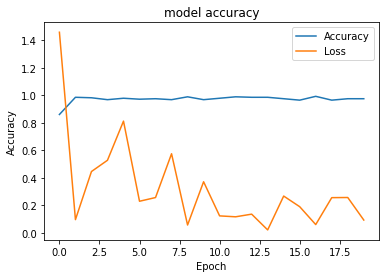

In [ ]:
plt.plot(irnv2history.history['accuracy'])
plt.plot(irnv2history.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Accuracy','Loss'])
plt.show()

Performance of diffrent Architecture